In [4]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from helpers import sum_features_per_software, keep_top_software

In [5]:
df = pd.read_excel('data/orig_df.xlsx', engine='openpyxl')

In [10]:
classes_dict = {
    'retrieval':['search', 'import', 'expertaddition', 'fulltextpdf'],
    'appraisal': ['tiabscreen', 'distinctscreen', 'dualscreen',
                   'wordhighlight', 'screeninautomation', 'deduplication'],
    'extraction': ['tag', 'extract', 'dualextract', 'evidencemap', 'riskofbias'],
    'output':['flowdiagram', 'writing', 'visualization', 'export'],
    'admin':['protocol', 'userroles', 'monitor', 'comments', 'training','support'],
    'access': ['free', 'multipleusers', 'living', 'publicoutputs']
    }

classes_pallettes = {
    'retrieval':['BuGn'],
    'appraisal': ['BuPu'],
    'extraction': ['Blues_r'],
    'output':['BrBG'],
    'admin':['BuPu'],
    'access': ['BuGn']
    }

CLASS NAME: retrieval
list: ['search', 'import', 'expertaddition', 'fulltextpdf', 'name']
COLOR:  Greens


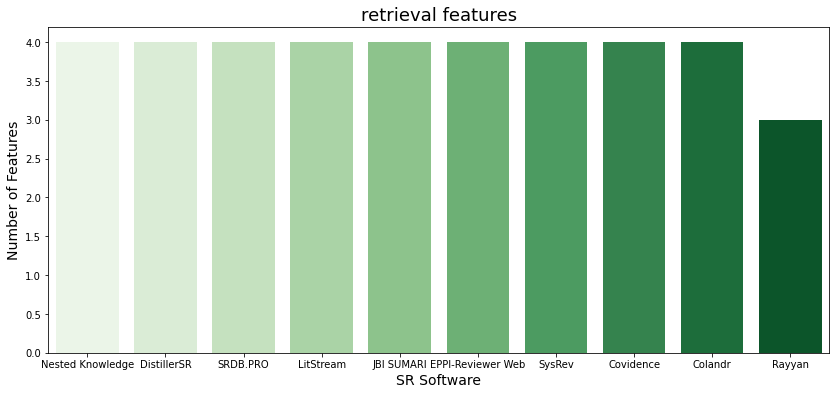

FIG CAPTION:  fig 2. Top ten systematic review softwares that support retrieval features
CLASS NAME: appraisal
list: ['tiabscreen', 'distinctscreen', 'dualscreen', 'wordhighlight', 'screeninautomation', 'deduplication', 'name']
COLOR:  flare


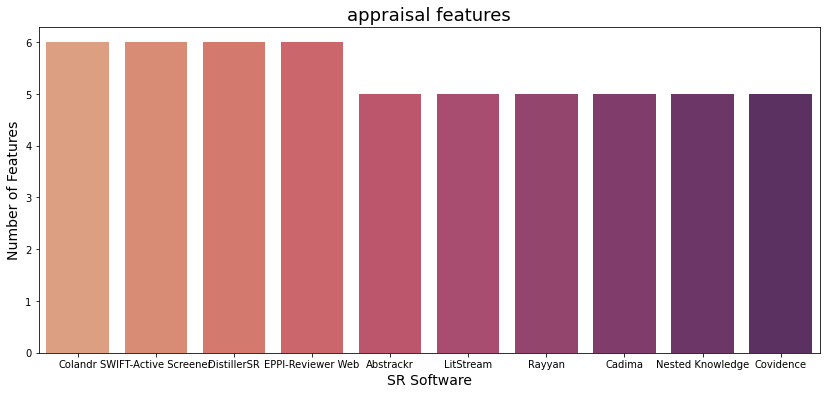

FIG CAPTION:  fig 3. Top ten systematic review softwares that support appraisal features
CLASS NAME: extraction
list: ['tag', 'extract', 'dualextract', 'evidencemap', 'riskofbias', 'name']
COLOR:  Blues_r


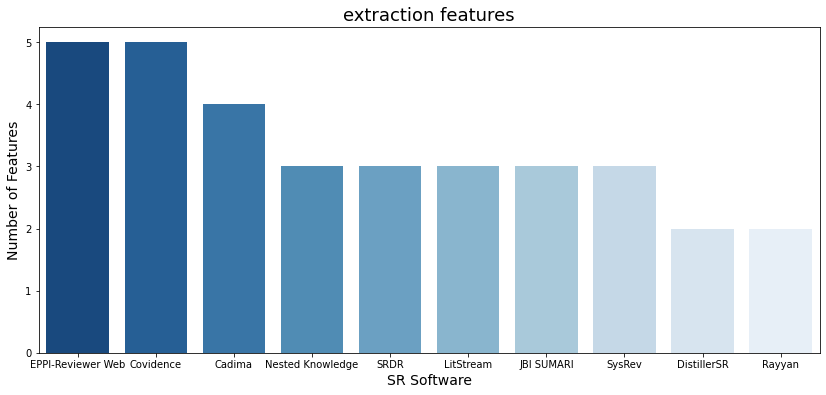

FIG CAPTION:  fig 4. Top ten systematic review softwares that support extraction features
CLASS NAME: output
list: ['flowdiagram', 'writing', 'visualization', 'export', 'name']
COLOR:  BrBG


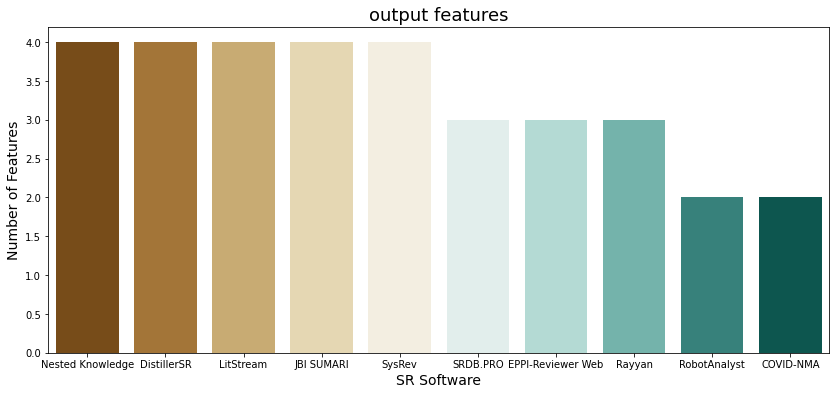

FIG CAPTION:  fig 5. Top ten systematic review softwares that support output features
CLASS NAME: admin
list: ['protocol', 'userroles', 'monitor', 'comments', 'training', 'support', 'name']
COLOR:  BuPu


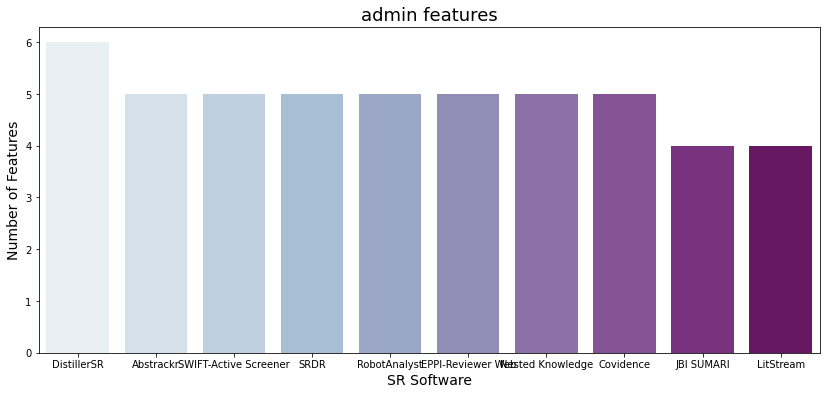

FIG CAPTION:  fig 6. Top ten systematic review softwares that support admin features
CLASS NAME: access
list: ['free', 'multipleusers', 'living', 'publicoutputs', 'name']
COLOR:  BuGn


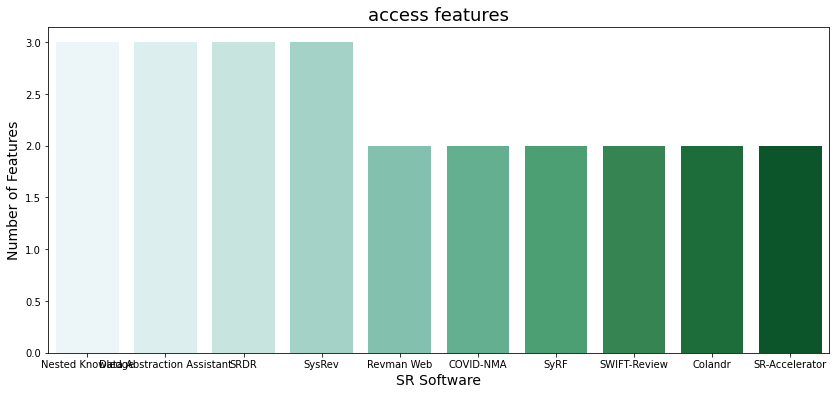

FIG CAPTION:  fig 7. Top ten systematic review softwares that support access features


In [11]:
captions = []
fig_num = 2

for k, v in classes_dict.items():  # For each feature class
    feature_key = k
    feature_value = classes_dict[k] # Store the column/variable names in a list
    
    if 'name' not in feature_value:
        feature_value.append('name') # Add the variable 'name'
    
    print("CLASS NAME:", feature_key)
    print("list:", feature_value)
    
    ftr_df = df[df.columns[df.columns.isin(feature_value)]]
    
    # Caculate summary statistics
    ftr_df = sum_features_per_software(ftr_df, 2)
    
    # Keep the top 8 softwares
    ftr_df = keep_top_software(ftr_df, "percent_of_features", 10)
    
    # Simplify names of main variables
    name = ftr_df['name']
    percent = ftr_df['percent_of_features']
    number = ftr_df['number_of_features']
    
    # Plot
    color = classes_pallettes[k][0]
    print("COLOR: ", color)
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(x=name, y=number, data=ftr_df, palette=color)
    ax.set_ylabel('Number of Features', fontsize=14)
    ax.set_xlabel('SR Software', fontsize=14) # Set the title to be the feature key
    ax.set_title(feature_key+' features', fontsize=18)
    plt.show()
    
    # PRINT OUT CAPTIONS
    fign = str(fig_num)
    fig_caption = "fig "+str(fig_num)+". "+"Top ten systematic review softwares that support "+feature_key+' features'
    captions.append(fig_caption)
    print("FIG CAPTION: ", fig_caption)
    
    # SAVE EACH FIGURE
    ax.get_figure().savefig('output/fig'+fign+'.png')

    fig_num = fig_num+1

In [8]:
print('test')
    
    #captions.append("fig 1. "+"Percent of Features for each SR Software (with a min of 5 non-NA features)")
    #plt.savefig('fig1)+iteration+.png'
    #fig++
    
    # For each class, graph percent
    # graph_p_by_feature(ftr_df, feature_class)
    
    

test


In [9]:
with open('output/captions.txt', 'w') as f:
    for line in captions:
        f.write(line)
        f.write('\n')